In [3]:
#-----------------IMPORTS-----------------#
from main_func import * #we import numba, numpy and the backtest function from here
import pandas as pd #we separately import pandas to read data from a csv file


#-----------------DATA-----------------#
#1min EURGBP data
url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339325&authkey=!AHOCBUokDjDiCc8"

#1 second EURGBP data
#url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339754&authkey=!ACcJZZPFqOmKVUY"

data_downloaded = pd.read_csv(url, parse_dates = True, index_col=0) #it's a time series data, so I'm setting the index to be the first column
close = data_downloaded["close"].to_numpy() #We transform the close prices into a numpy array

In [9]:
### Need to split the time series
import numpy as np

returns = np.zeros(len(close))
for i in range(1,len(close)):
    returns[i] = (close[i] - close[i-1]) / close[i-1]


returns_segments = np.array_split(returns, 10)
np.random.shuffle(returns_segments) #this command shuffles the segments in place
shuffled_returns = np.concatenate(returns_segments) #we concatenate the shuffled segments into a single array

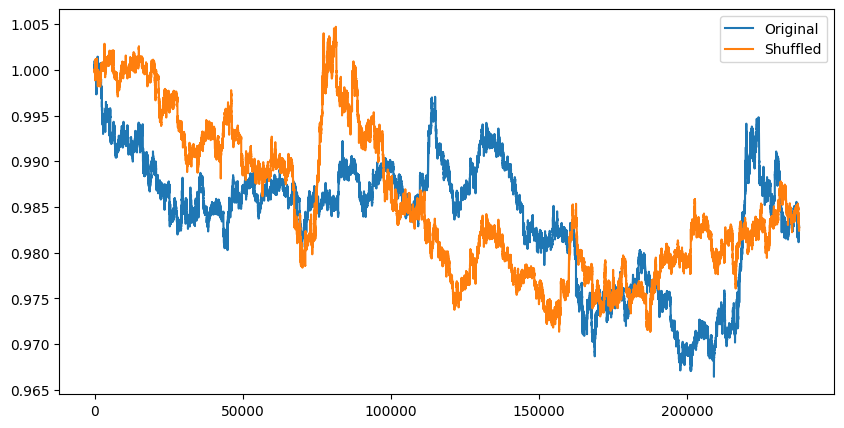

In [10]:
import matplotlib.pyplot as plt

original_price = np.cumprod(1+returns)
shuffled_price = np.cumprod(1+shuffled_returns)

fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(original_price, label="Original")
ax.plot(shuffled_price, label="Shuffled")
ax.legend()
plt.show()